<a href="https://colab.research.google.com/github/SrishtiSharma645/Handwritten-Digit-Recognition/blob/main/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.7746 - loss: 0.7019 - val_accuracy: 0.9778 - val_loss: 0.0780
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.9636 - loss: 0.1215 - val_accuracy: 0.9837 - val_loss: 0.0564
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.9733 - loss: 0.0867 - val_accuracy: 0.9858 - val_loss: 0.0493
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 95ms/step - accuracy: 0.9806 - loss: 0.0646 - val_accuracy: 0.9868 - val_loss: 0.0450
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.9826 - loss: 0.0569 - val_accuracy: 0.9877 - val_loss: 0.0448
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.9859 - loss: 0.0478 - val_accuracy: 0.9883 - val_loss: 0.0400
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 94ms/step - accuracy: 0.9866 - loss: 0.0419 - val_accuracy: 0.9897 - val_loss: 0.0394
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.9871 - loss: 0.0393 -

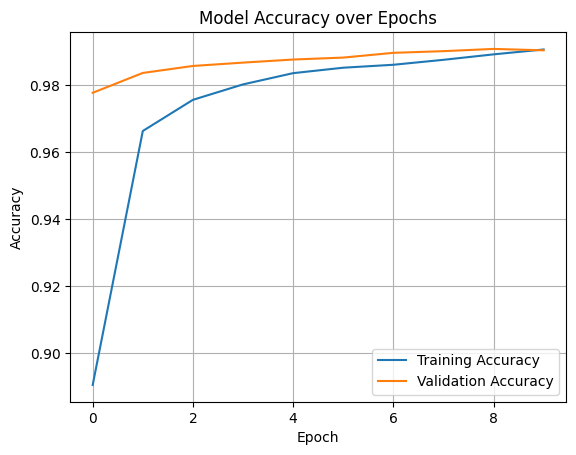

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


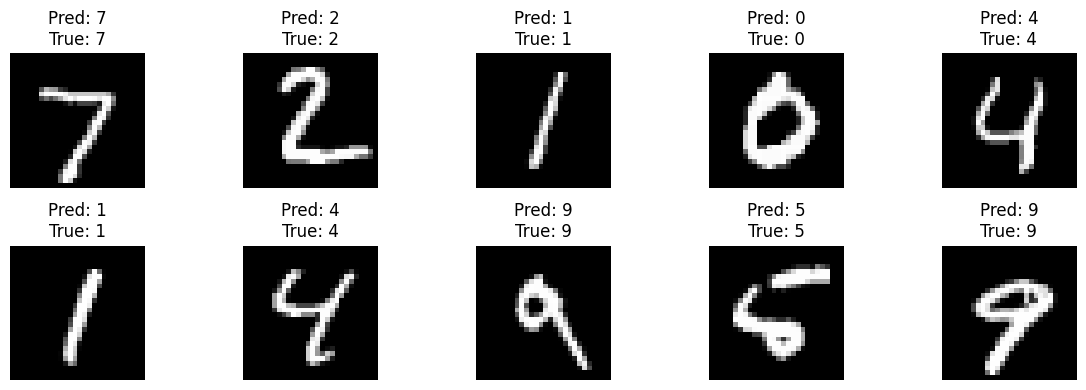

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Predict on test images
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Visualize some predictions
def display_predictions(images, predictions, labels, num=10):
    plt.figure(figsize=(12, 4))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predictions[i]}\nTrue: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_predictions(x_test, predicted_classes, true_classes)

# Save the model
model.save("digit_recognition_cnn_model.h5")
